In [64]:
# 数据集介绍
# User_ID：用户的唯一标识，用于区分不同的用户，如 1000001、1000002 等。
# Product_ID：产品的唯一标识，用于区分不同的产品，如 P00069042、P00248942 等。
# Gender：用户的性别，取值为 “F”（女性）或 “M”（男性）。
# Age：用户的年龄分组，包括 “0-17”“26-35”“46-50”“51-55”“55+” 等年龄段。
# Occupation：用户的职业，以数字形式表示不同的职业类别，如 10、16、15 等。
# City_Category：用户所在城市的类别，取值为 “A”“B”“C”，可能代表不同规模或类型的城市。
# Stay_In_Current_City_Years：用户在当前城市居住的年数，取值有 “1”“2”“3”“4+” 等。
# Marital_Status：用户的婚姻状况，“0” 可能表示未婚，“1” 可能表示已婚。
# Product_Category_1：产品所属的第一类类别，以数字标识，如 3、1、8 等。
# Product_Category_2：产品所属的第二类类别，部分数据为空，有数据的如 6、2、14 等。
# Product_Category_3：产品所属的第三类类别，部分数据为空，有数据的如 14、15、16 等。
# Purchase：用户购买产品的消费金额，如 8370、15200、1422 等。
# 这份数据集可以用于分析不同用户群体（如不同性别、年龄、职业、婚姻状况、居住城市等）的消费行为（购买的产品类别、消费金额等），以及产品的销售情况（不同产品的购买金额、所属类别等）。

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 读取数据
data = pd.read_csv('sales_data.csv')

In [66]:
# 数据清洗
# 处理缺失值
print("缺失值情况：")
print(data.isnull().sum())
data.fillna(0, inplace=True)

缺失值情况：
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64


In [67]:
# 处理重复值
duplicate_rows = data.duplicated()
print("\n重复值数量:", duplicate_rows.sum())
data = data.drop_duplicates()


重复值数量: 0


In [68]:
# 处理异常值（以Purchase列为例，使用IQR方法）
Q1 = data['Purchase'].quantile(0.25)
Q3 = data['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Purchase'] >= lower_bound) & (data['Purchase'] <= upper_bound)]

In [69]:
# 描述性统计
numerical_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print("\n数值型变量描述性统计：")
print(data[numerical_columns].describe())

print("\n类别型变量描述性统计：")
print(data[categorical_columns].describe())


数值型变量描述性统计：
            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.349120e+05  534912.000000   534912.000000       534912.000000   
mean   1.002991e+06       8.080673        0.408624            5.268983   
std    1.714130e+03       6.523152        0.491580            3.739120   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001495e+06       2.000000        0.000000            1.000000   
50%    1.003031e+06       7.000000        0.000000            5.000000   
75%    1.004416e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           18.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       534912.000000       534912.000000  534912.000000  
mean             6.758013            3.872235    9264.683312  
std              6.203385            6.263190    4895.538823  
min              0.000000            0.000000     185.000000  
25%  

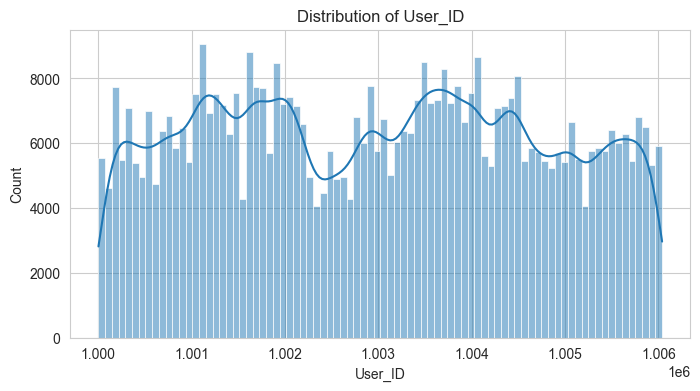

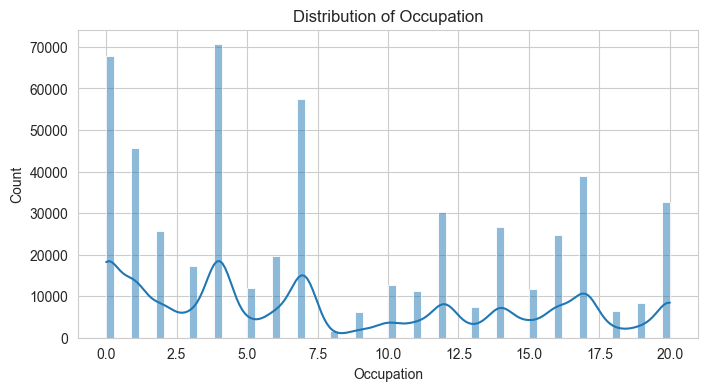

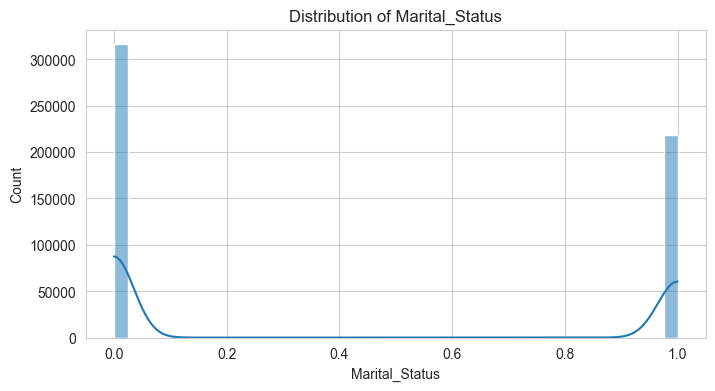

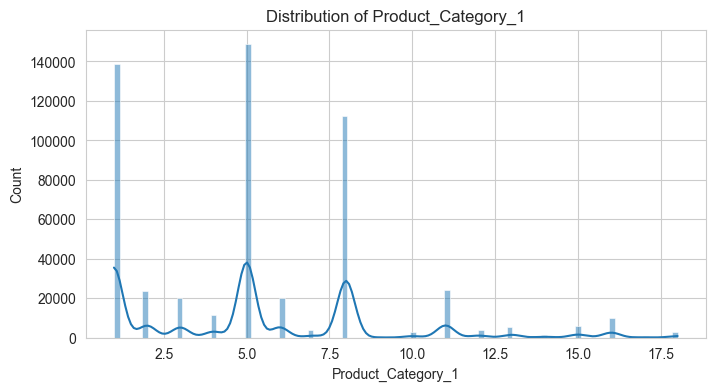

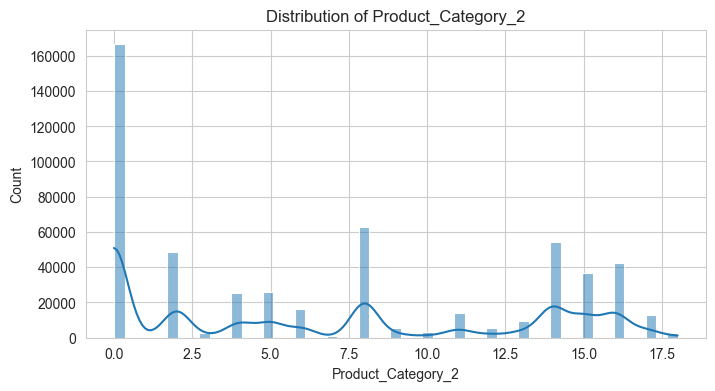

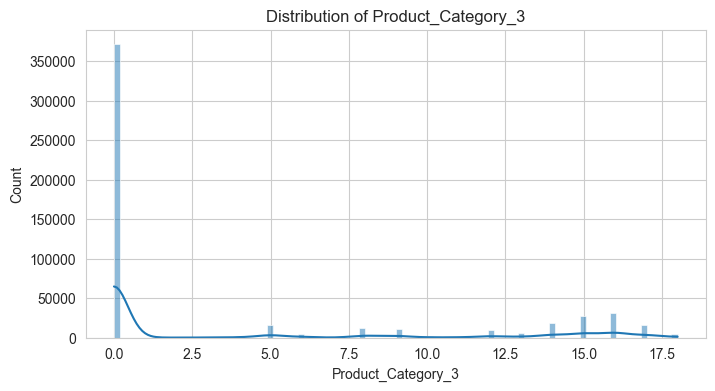

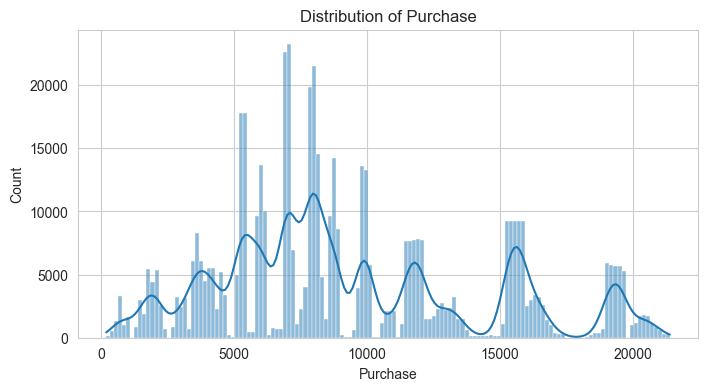

In [70]:
# 可视化
# 数值型变量分布
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

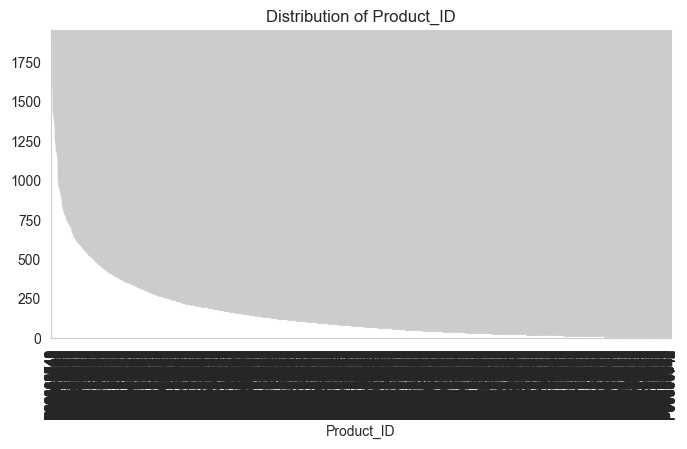

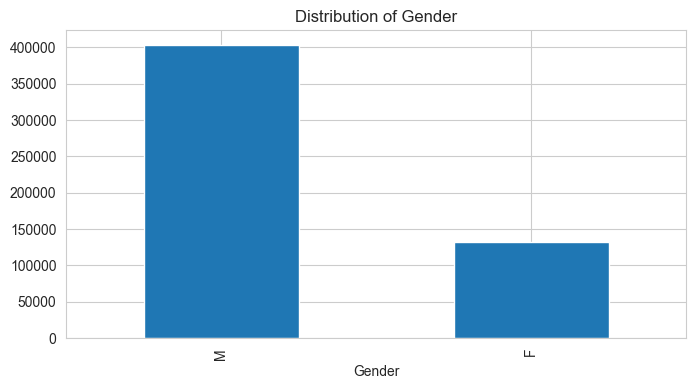

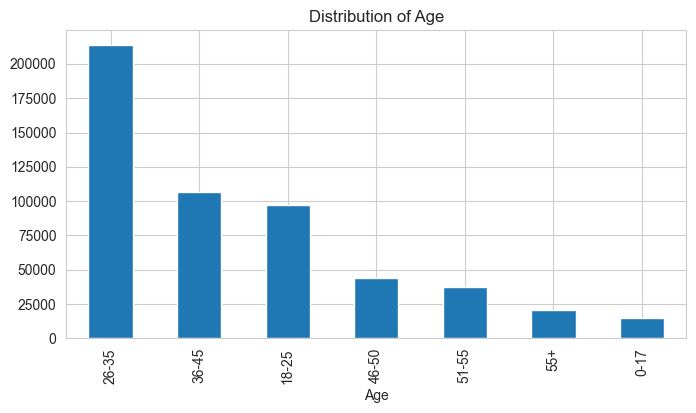

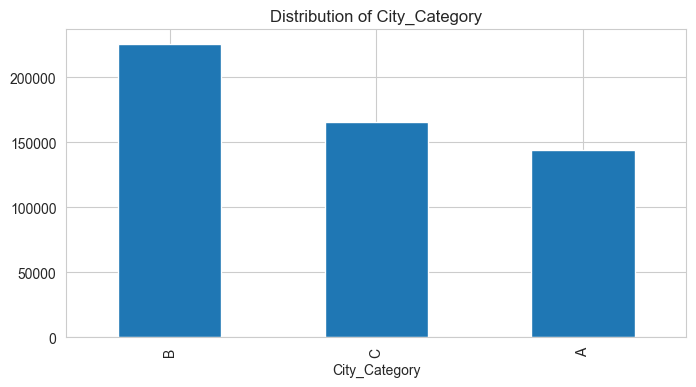

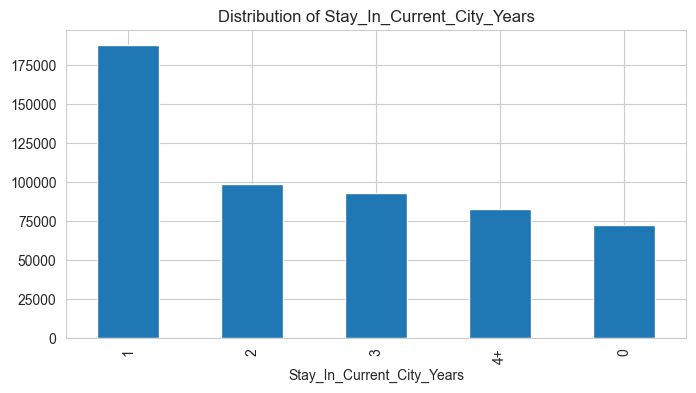

In [71]:
# 类别型变量分布
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()

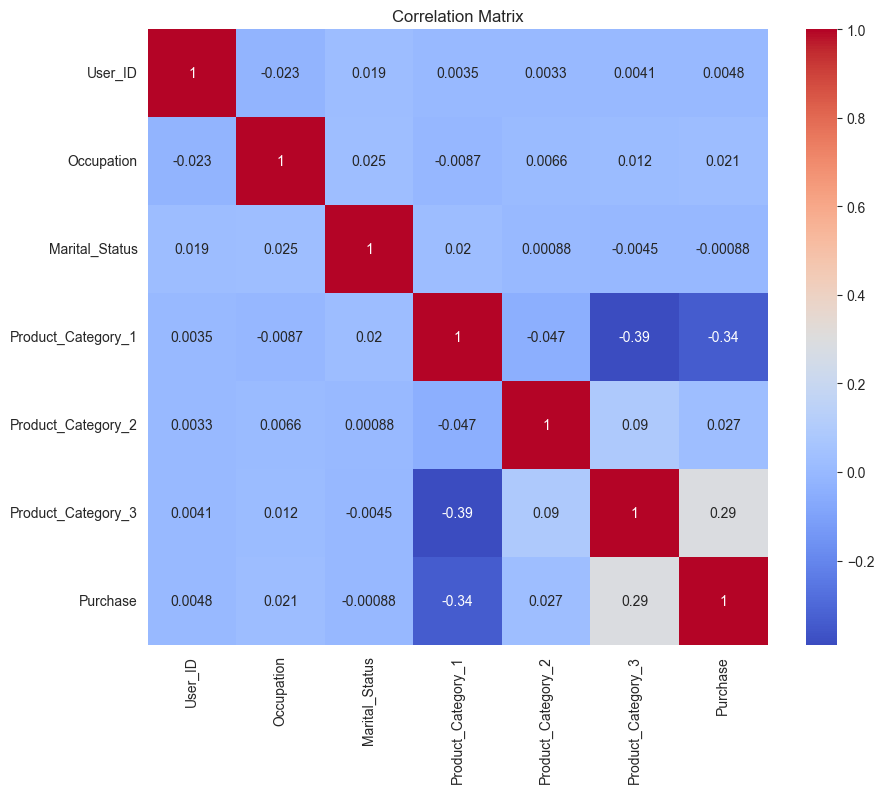

In [72]:
# 相关性分析
correlation = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [73]:
# 标准化
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [74]:
#  特征提取前后对比
# 特征提取前
# 原始数据包含高维特征，且不同特征量纲不一致（如 Age 和 Purchase）。
# 存在冗余特征，可能影响模型性能。
# 特征提取后
# 标准化：通过标准化使不同量纲的特征可比，提升模型训练效果。
# 业务意义：标准化确保各特征对模型的贡献度均衡，避免因量纲差异导致某些特征主导模型。
# 降维（PCA）：未在代码中看到 PCA 的具体实现，但可以考虑使用 PCA 降低高维数据冗余。
# 业务意义：减少计算复杂度，同时保留主要信息，提高模型效率。

In [75]:
# 处理异常值（以Purchase列为例，使用IQR方法）
Q1 = data['Purchase'].quantile(0.25)
Q3 = data['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Purchase'] >= lower_bound) & (data['Purchase'] <= upper_bound)]

不同职业的购买金额总和：
Occupation
-1.238769   -2047.891488
-1.085469   -3044.354148
-0.932169   -1722.453241
-0.778869    -333.515184
-0.625568    -585.994380
-0.472268     177.662990
-0.318968      12.379990
-0.165667    2023.719075
-0.012367      77.569964
 0.140933    -729.008798
 0.294233    -665.028900
 0.447534    -175.714611
 0.600834    3293.135952
 0.754134      67.542929
 0.907434    1250.124184
 1.060735    1217.382032
 1.214035     614.229418
 1.367335    4547.617064
 1.520635    -113.277697
 1.673936   -1019.630519
 1.827236   -3172.627381
Name: Purchase, dtype: float64

不同职业的平均购买金额：
Occupation
-1.238769   -0.030214
-1.085469   -0.066591
-0.932169   -0.067069
-0.778869   -0.019298
-0.625568   -0.008302
-0.472268    0.014880
-0.318968    0.000628
-0.165667    0.035177
-0.012367    0.051134
 0.140933   -0.118731
 0.294233   -0.052860
 0.447534   -0.015622
 0.600834    0.108943
 0.754134    0.009023
 0.907434    0.047054
 1.060735    0.103792
 1.214035    0.024906
 1.367335    0.116953

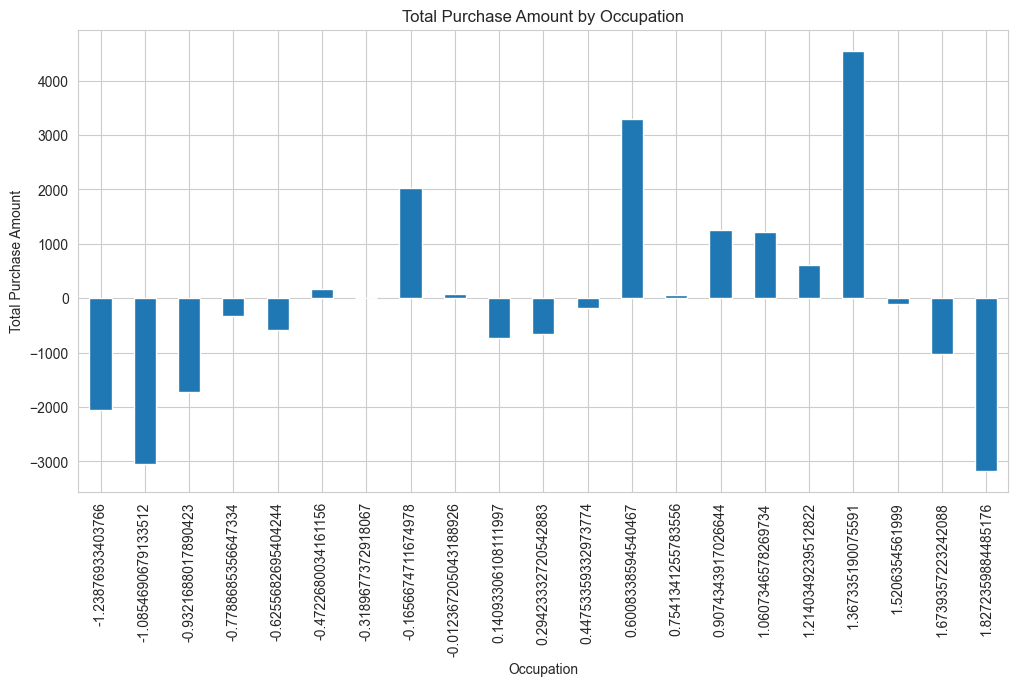

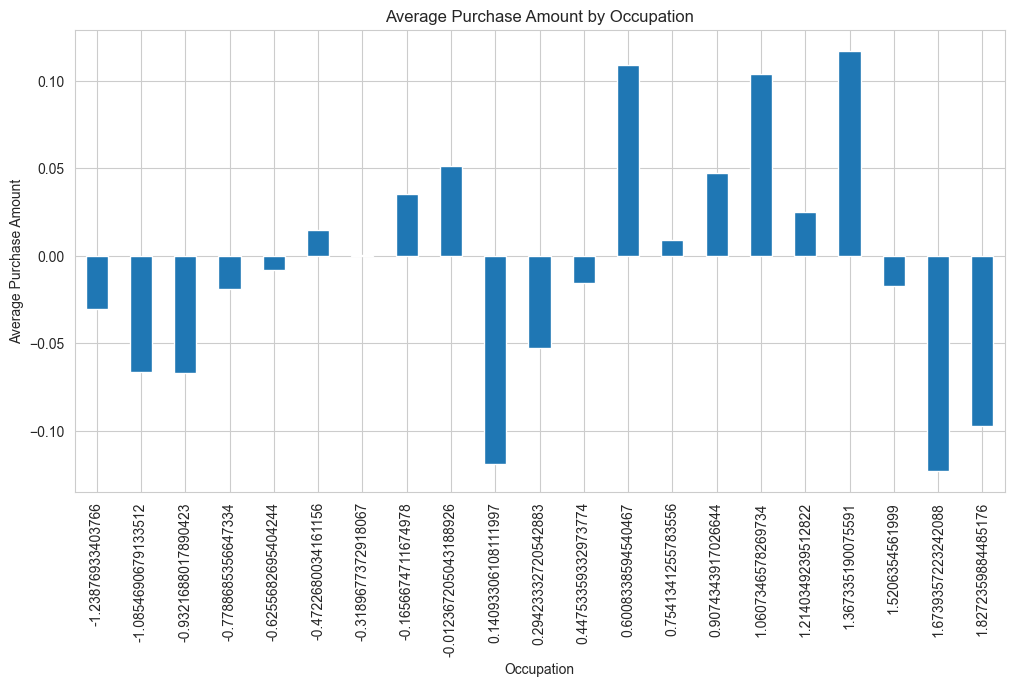

In [76]:
# 按职业统计购买金额总和
occupation_purchase_sum = data.groupby('Occupation')['Purchase'].sum()
print("不同职业的购买金额总和：")
print(occupation_purchase_sum)

# 按职业统计平均购买金额
occupation_purchase_mean = data.groupby('Occupation')['Purchase'].mean()
print("\n不同职业的平均购买金额：")
print(occupation_purchase_mean)

# 可视化不同职业的购买金额总和
plt.figure(figsize=(12, 6))
occupation_purchase_sum.plot(kind='bar')
plt.title('Total Purchase Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Purchase Amount')
plt.show()

# 可视化不同职业的平均购买金额
plt.figure(figsize=(12, 6))
occupation_purchase_mean.plot(kind='bar')
plt.title('Average Purchase Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Purchase Amount')
plt.show()

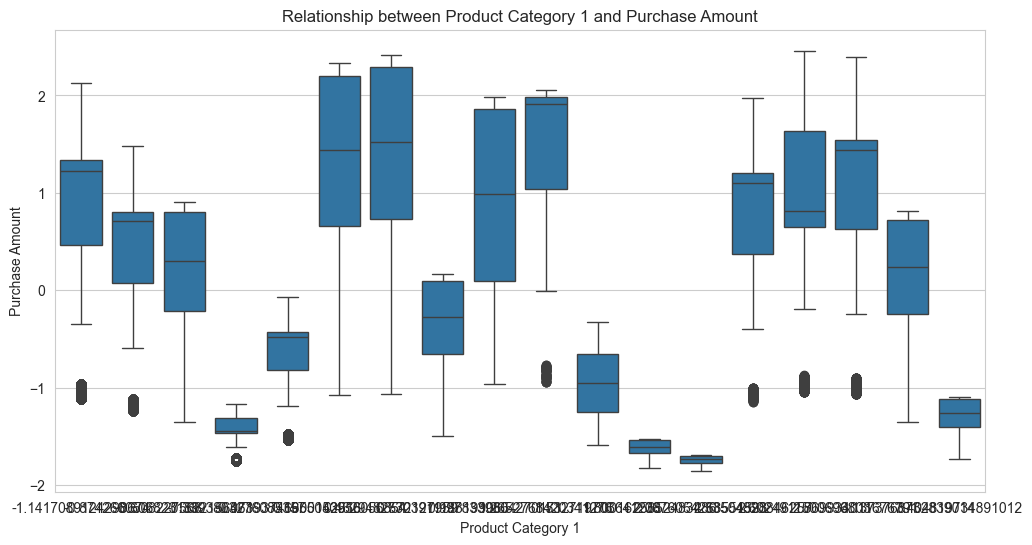

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product_Category_1', y='Purchase', data=data)
plt.title('Relationship between Product Category 1 and Purchase Amount')
plt.xlabel('Product Category 1')
plt.ylabel('Purchase Amount')
plt.show()

购买次数和总购买金额的相关性：
                       Purchase_Count  Total_Purchase_Amount
Purchase_Count               1.000000              -0.365679
Total_Purchase_Amount       -0.365679               1.000000


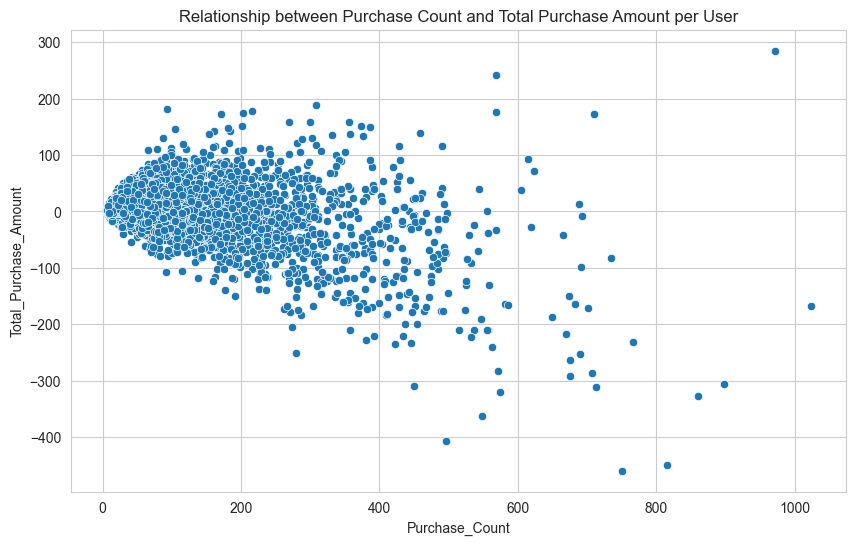

In [78]:
# 计算每个用户的购买次数
user_purchase_count = data.groupby('User_ID')['Purchase'].count().reset_index()
user_purchase_count.rename(columns={'Purchase': 'Purchase_Count'}, inplace=True)

# 计算每个用户的总购买金额
user_total_purchase = data.groupby('User_ID')['Purchase'].sum().reset_index()
user_total_purchase.rename(columns={'Purchase': 'Total_Purchase_Amount'}, inplace=True)

# 合并两个数据
user_purchase_analysis = pd.merge(user_purchase_count, user_total_purchase, on='User_ID')

# 分析购买次数和总购买金额的相关性
correlation_user = user_purchase_analysis[['Purchase_Count', 'Total_Purchase_Amount']].corr()
print("购买次数和总购买金额的相关性：")
print(correlation_user)

# 可视化购买次数和总购买金额的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase_Count', y='Total_Purchase_Amount', data=user_purchase_analysis)
plt.title('Relationship between Purchase Count and Total Purchase Amount per User')
plt.show()

In [79]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 读取数据
try:
    data = pd.read_csv('sales_data.csv')
except FileNotFoundError:
    print("未找到文件，请检查文件路径和文件名。")
else:
    # 选择需要的列，排除非数值列
    numerical_data = data.select_dtypes(include=['number'])
    numerical_data = numerical_data.fillna(0)

    # 数据标准化
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numerical_data)

    # 创建 PCA 模型，这里假设保留 2 个主成分
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_data)

    # 将主成分转换为 DataFrame
    principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # 查看主成分解释的方差比例
    explained_variance_ratio = pca.explained_variance_ratio_
    print("主成分解释的方差比例:", explained_variance_ratio)

    # 保存结果到新的 CSV 文件
    principal_df.to_csv('sales_data_pca.csv', index=False)
    print("PCA 处理后的数据已保存到 sales_data_pca.csv")


主成分解释的方差比例: [0.2393937  0.14664942]
PCA 处理后的数据已保存到 sales_data_pca.csv
